In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
from nltk import pos_tag
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
from string import punctuation

# import warnings
# warnings.filterwarnings('ignore')

## Data Loading

In [2]:
df = pd.read_csv(r'G:\ML projects\IMDB-Dataset.csv', encoding = 'latin-1')

## Data Cleaning And Preprocessing

In [3]:
stop_words = stopwords.words('english')
new_stopwords = ["would", "shall", "could", "might", "film", "movie", "director", "scene", "character", "actor", "actress"]
stop_words.extend(new_stopwords)

negations_and_sentiment_words = ["not", "no", "never", "n't", "none", "good", "bad", "love", "hate"]

for word in negations_and_sentiment_words:
    if word in stop_words:
        stop_words.remove(word)

stop_words = set(stop_words)
print(stop_words)

{'actor', 'was', 'has', 's', 'been', 'might', 'under', 'again', 'would', "she's", 'does', 'between', 'why', "weren't", 'i', 'below', "shan't", "couldn't", 'of', 'then', 'most', 'some', 'wasn', "doesn't", 'they', 'over', "needn't", 'it', 'these', 'the', 'in', 'nor', "it's", "you'll", 'have', 'hasn', 'actress', 'are', 'needn', 'out', 'doing', 'own', "mustn't", 'shall', 'character', 'being', "isn't", 'now', 'wouldn', 'up', 'or', 'each', 'me', 'how', "shouldn't", 'about', 'having', 'myself', 'there', 've', "aren't", 'after', 'am', 'hadn', 'more', "hadn't", "don't", 'did', "didn't", 'my', 'into', "you've", 'hers', 'mustn', 'with', 'could', 'as', 'at', 'his', 'your', 'because', 'yours', 'for', 'but', 'if', "wasn't", 'which', 'here', 'all', 'than', 'only', 'itself', "haven't", 'isn', 'ourselves', 'film', 'what', 'will', 'their', 'can', 're', 'him', 'such', 'scene', 'himself', 'couldn', 'director', 'when', 'm', 'her', 'same', 'weren', 'movie', 'shan', 'our', "that'll", 'who', "wouldn't", 'befo

In [4]:
'''-----------------------------Data Cleaning and Preprocessing pipeline----------------------------------'''

#Removing special character
def remove_special_character(content):
    # return re.sub(r'\W+',' ', content )
    return re.sub(r'\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content

In [5]:
pd.options.display.max_colwidth = 1000

#Data cleaning
df['Reviews_clean'] = df['Reviews'].apply(data_cleaning)
df.head(1)

,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* IsenÃ§Ã£o de responsabilidade: eu sÃ³ assisti esse filme como um acordo condicional. E eu vejo filmes de graÃ§a. Eu nÃ£o seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crÃ­tica mais curta de todos os tempos. NÃ£o vÃª este filme. Ã de longe o filme mais estÃºpido, lamenta, preguiÃ§oso e inacreditavelmente UNFUNNY que eu jÃ¡ vi. Ã um desastre total. Mas como o meu Ã³dio por este filme e por outros, se estende muito alÃ©m de uma exibiÃ§Ã£o, acho que vou continuar um pouco. NÃ£o conheÃ§o nenhuma das pessoas do filme alÃ©m de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso nÃ£o importa. Eles sÃ£o todos horrÃ­veis, embora eu ache que esse seja o ponto. A ediÃ§Ã£o Ã© horrÃ­vel e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrÃ­vel do que eu pensava. Agora eu sei que esses filmes nÃ£o devem ser sÃ©rios, mas vamos lÃ¡, Ã© o cinema 101 que se alguÃ©m f...",watched conditional see films not caught dead giving hard earned money explain depth write shortest not see far unbelievably unfunny ever total since hatred others like extends far beyond one think go not know people besides carmen vanessa kim not though think editing flat possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come someone gets minor facial next someone gets cut blood least cut since narnia films away give disaster pass thoughtless mindless physical gags obviously take popular movies last year late including best picture know saddest thing stupid movies not care much money many cameos sorry ass excuses films taking away jobs directors truly deserve thought better taste ashamed making kind jason friedberg aaron burn guys contributing decline western cause downfall western


## Feature Engineering

In [19]:
#Mapping rating data to Binary label 1 (+ve) if rating >=7 and 0 (-ve) if rating <=4 and 2 (neutral) if rating = 5 or 6
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
df = df[df.Label < '2']
data = df[['Reviews_clean', 'Reviews', 'Ratings', 'Label']]
print(data['Label'].value_counts())

Label
0    60000
1    60000
Name: count, dtype: int64


## Model Imports

In [20]:
#Importing dependencies for feature engineering 
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, accuracy_score,precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Lemmatization

In [21]:
# lemmatization of word 
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]
    
# Create an instance of the LemmaTokenizer
lemmatizer = LemmaTokenizer()

# Example text to be lemmatized
text = "The cats are sitting on the mat, and they are purring."

# Lemmatize the text
lemmatized_words = lemmatizer(text)

print(lemmatized_words)

['The', 'cat', 'are', 'sitting', 'on', 'the', 'mat', ',', 'and', 'they', 'are', 'purring', '.']


## Vectoization with TFIDF Vectorizer with Unigram, Bigram and Trigram

In [22]:
train, test = train_test_split(data, test_size=.3, random_state=42, shuffle=True)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1, 3), min_df=10, max_features=500)

x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

g:\ML projects\sentiment_analysis\env\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## Logistic Regression Models

In [23]:
model_1 = LogisticRegression(
    penalty='l2',        # This is the regularization technique used to prevent overfitting.
    dual=False,          # This is used when the number of features is greater than the number of samples.
    tol=0.001,          # The tolerance for stopping criteria.
    C=1,                # The inverse of regularization strength; smaller values mean stronger regularization.
    solver='lbfgs',      # The algorithm used for optimization.
    max_iter=200,        # Maximum number of iterations taken for the solvers to converge.
    multi_class='auto',  # Determines how the multi-class problem is handled.
    verbose=0,           # Controls the verbosity of the solver.
    warm_start=False,    # Reuses the solution of the previous call to fit as initialization.
    n_jobs=None          # Number of CPU cores used when parallelizing.
)

model_2 = Pipeline(
    steps=[
        ('vect', TfidfVectorizer(
            analyzer='word',         # Analyzes words.
            tokenizer=LemmaTokenizer(),  # Tokenizes the text using a custom tokenizer.
            ngram_range=(1, 3),      # Considers unigrams, bigrams, and trigrams.
            min_df=10,               # Ignores terms that appear in fewer than 10 documents.
            max_features=10000       # Limits the number of features.
        )),
        ('classifier', LogisticRegression(
            penalty='l2',
            dual=False,
            tol=0.001,
            C=1,
            solver='lbfgs',
            max_iter=100,
            multi_class='auto',
            verbose=0,
            warm_start=False,
            n_jobs=None
        ))
    ]
)

## Training of Logistic Regression Models

In [24]:
model_1.fit(x_train_tfidf, y_train)

g:\ML projects\sentiment_analysis\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, max_iter=200, multi_class='auto', tol=0.001)

In [25]:
model_2.fit(train['Reviews_clean'], y_train)

g:\ML projects\sentiment_analysis\env\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
g:\ML projects\sentiment_analysis\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('vect',
                 TfidfVectorizer(max_features=10000, min_df=10,
                                 ngram_range=(1, 3),
                                 tokenizer=<__main__.LemmaTokenizer object at 0x000002934DC52750>)),
                ('classifier',
                 LogisticRegression(C=1, multi_class='auto', tol=0.001))])

## Evaluation of the Models

In [26]:
print("***** Model 1 : Basic Logistic Regression Model *****")

model1_prediction = model_1.predict(x_test_tfidf)

print("Precision Score for Logistic Regression: %s" % precision_score(y_test, model1_prediction, average='micro'))
print("Recall Score for Logistic Regression: %s" % recall_score(y_test, model1_prediction, average='micro'))
print("AUC Score for Logistic Regression: %s" % roc_auc_score(y_test, model_1.predict_proba(x_test_tfidf)[:,1], multi_class='ovo', average='macro'))

f1_score_1 = f1_score(y_test, model1_prediction, average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)
print("Accuracy Score for Logistic Regression: %s" % accuracy_score(y_test, model1_prediction))
print("\n")


print("***** Model 2 : Logistic Regression Model with Pipeline *****")

model2_prediction = model_2.predict(test['Reviews_clean'])

print("Precision Score for Logistic Regression Pipeline: %s" % precision_score(y_test, model2_prediction, average='micro'))
print("Recall Score for Logistic Regression Pipeline: %s" % recall_score(y_test, model2_prediction, average='micro'))
print("AUC Score for Logistic Regression Pipeline: %s" % roc_auc_score(y_test, model_2.predict_proba(test['Reviews_clean'])[:,1], multi_class='ovo', average='macro'))

f1_score_2 = f1_score(y_test, model2_prediction, average="weighted")
print("F1 Score for Logistic Regression Pipeline: %s" % f1_score_2)
print("Accuracy Score for Logistic Regression Pipeline: %s" % accuracy_score(y_test, model2_prediction))

***** Model 1 : Basic Logistic Regression Model *****
Precision Score for Logistic Regression: 0.8158055555555556
Recall Score for Logistic Regression: 0.8158055555555556
AUC Score for Logistic Regression: 0.8984561249283894
F1 Score for Logistic Regression: 0.8158079112907944
Accuracy Score for Logistic Regression: 0.8158055555555556


***** Model 2 : Logistic Regression Model with Pipeline *****
Precision Score for Logistic Regression Pipeline: 0.8763888888888889
Recall Score for Logistic Regression Pipeline: 0.8763888888888889
AUC Score for Logistic Regression Pipeline: 0.9476600388796153
F1 Score for Logistic Regression Pipeline: 0.8763913210941806
Accuracy Score for Logistic Regression Pipeline: 0.8763888888888889


In [14]:
y_predict = model_1.predict(x_test_tfidf)
y_predict_prob = model_1.predict_proba(x_test_tfidf)[:,1]

print(y_predict)
print(y_predict_prob)
print(model_1.predict_proba(x_test_tfidf))

['0' '0' '0' ... '0' '1' '1']
[0.24560192 0.36714634 0.03738616 ... 0.41452506 0.70919657 0.52384074]
[[0.75439808 0.24560192]
 [0.63285366 0.36714634]
 [0.96261384 0.03738616]
 ...
 [0.58547494 0.41452506]
 [0.29080343 0.70919657]
 [0.47615926 0.52384074]]


## Confusion Matrix

In [27]:
def confusion_matrix_plot(y_test, y_score):
    confmatrix = confusion_matrix(y_test, y_score)
    fig, ax = plt.subplots(figsize=(3, 3))
    
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)

    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')

    plt.show()

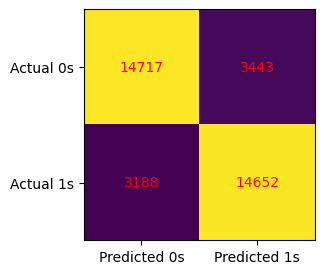

In [28]:
confusion_matrix_plot(y_test, y_predict)

## Analyzing False Positive and False Negative 

In [29]:
from colorama import Fore, Back, Style

fn_dict = {}
fp_dict = {}

y_test_list = y_test.tolist()
y_predict_list = y_predict.tolist()
test_list = test['Reviews_clean'].tolist()
rating_list = test['Ratings'].tolist()

for i in range(0, len(y_test_list)):
    if ((y_test_list[i] == '0') & (y_predict_list[i] == '1')): fp_dict[i] = [test_list[i], rating_list[i]]
    elif ((y_test_list[i] == '1') & (y_predict_list[i] == '0')): fn_dict[i] = [test_list[i], rating_list[i]]
    else: pass
    i+=1

for k, v in fp_dict.items():
    if v[1] <= 2: print(Fore.RED + 'False Positive: %s %s' %(k, v))
        
for k, v in fn_dict.items():
    if v[1] >= 9: print(Fore.GREEN +' False Negative: %s %s' %(k, v))

False Positive: 7 ['inside no way earth developers thought consumer find appealing shape horrendous train wreck nothing redeeming developers thrust avgn great job spoofing', 1.0]
False Positive: 15 ['good satire subtle also helps immensely good satire choose watch open mind retrospect touch opening shiftless bum blow devil angel via soul well birther subtlety brick ok pj hour half later watched whole thing yes instantly regretted found not not laugh spent time dumbfounded inept interspersed numerous staged conservative rendered ammo idiots say conservatives not funny site example example prove point forced say got walk', 2.0]
False Positive: 111 ['anyone right mind think intended applied real fictional joke something used part taken context hubbard wrote fictional movies no different entertainment written intention making people think weird crazy fictional not turned religious watch feel sorry take intended fictional not instructional video live', 1.0]
False Positive: 156 ['favorite ki

# XAI: Explainable AI by Shap and LIME

## Explain Marginal Contribution of Features by Shap

In [31]:
import shap
shap.initjs()

g:\ML projects\sentiment_analysis\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


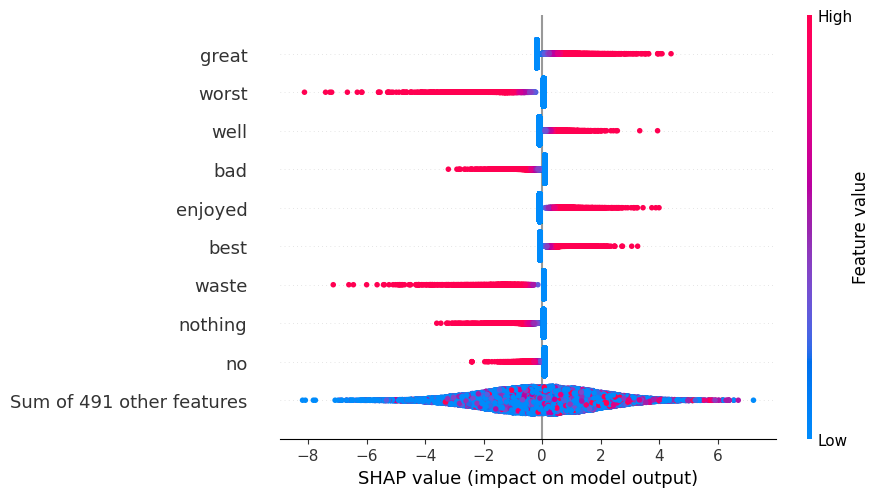

In [33]:
explainer = shap.Explainer(model_1, x_train_tfidf, feature_names=tfidfvect.get_feature_names_out())
shap_values = explainer(x_test_tfidf)

shap.plots.beeswarm(shap_values)

## Visualizing Marginal Contribution of Features for False Positive 

In [53]:
ind = 15
print('Probability Score %s' %y_predict_prob[ind])
print("Positive" if y_test_list[ind] == '1' else "Negative", "Review:")
print(test_list[ind])
shap.plots.force(shap_values[ind])

Probability Score 0.7023222264603582
Negative Review:
good satire subtle also helps immensely good satire choose watch open mind retrospect touch opening shiftless bum blow devil angel via soul well birther subtlety brick ok pj hour half later watched whole thing yes instantly regretted found not not laugh spent time dumbfounded inept interspersed numerous staged conservative rendered ammo idiots say conservatives not funny site example example prove point forced say got walk


## Visualizing Marginal Contribution of Features for False Negative

In [54]:
ind = 27
print('Probability Score %s' %y_predict_prob[ind])
print("Positive" if y_test_list[ind] == '1' else "Negative", "Review:")
print(test_list[ind])
shap.plots.force(shap_values[ind])

Probability Score 0.3603843038032972
Positive Review:
cruising cable channels saw coming saw dated assumed version story marvel comics not familiar took time clue fact something entirely something quite expression not pull eyes away something terrible perverted sort lured kept laughing several points even slightly disgusted watching twisted metal piled began fairly interesting psychological exercise watch try imagine thought processes behind ideas psychology not cup equally enjoyable time likely watching thought processes simply bizarre jumps one scenario next lively nothing formulaic cannot good conscience give even though experience simply expect people unable keep ready see ridiculous flick humour strictly stand delivers high train wreck


## Explain feature impact on Prediction by LIME

In [61]:
from lime.lime_text import LimeTextExplainer

class_names = [0, 1]
explainer = LimeTextExplainer(class_names = class_names)

ind = 15
exp = explainer.explain_instance(test_list[ind], model_2.predict_proba, num_features = 100, top_labels = 2)

print('New document id: %d' % ind)
print(test_list[ind])
print('Predicted Label =', model_2.predict([test_list[ind]])) ## model_2 has different hyper parameters hence predictions are different 
print('Predicted probabilites =', model_2.predict_proba([test_list[ind]]))
print('Actual Label: %s' % y_test_list[ind])

print(exp.available_labels())

exp.show_in_notebook(text=True)

New document id: 15
good satire subtle also helps immensely good satire choose watch open mind retrospect touch opening shiftless bum blow devil angel via soul well birther subtlety brick ok pj hour half later watched whole thing yes instantly regretted found not not laugh spent time dumbfounded inept interspersed numerous staged conservative rendered ammo idiots say conservatives not funny site example example prove point forced say got walk
Predicted Label = ['0']
Predicted probabilites = [[0.62438135 0.37561865]]
Actual Label: 0
[np.int64(0), np.int64(1)]


In [62]:
exp.as_list(label=1)

[(np.str_('not'), -0.16908952132128097),
 (np.str_('example'), -0.15555370430022894),
 (np.str_('yes'), 0.1132258466865842),
 (np.str_('good'), 0.105573307683974),
 (np.str_('subtle'), 0.08806226677920687),
 (np.str_('open'), 0.0868272458007916),
 (np.str_('spent'), -0.07611380896821245),
 (np.str_('well'), 0.07608148180226552),
 (np.str_('forced'), -0.06847621071095045),
 (np.str_('half'), -0.06246800243055849),
 (np.str_('inept'), -0.061490426067657054),
 (np.str_('ok'), -0.059202283469430315),
 (np.str_('thing'), -0.05916343385193079),
 (np.str_('hour'), -0.05463471765557645),
 (np.str_('satire'), 0.05316160698779245),
 (np.str_('touch'), 0.052090200092806516),
 (np.str_('mind'), 0.04912317096715958),
 (np.str_('funny'), -0.04524241350738396),
 (np.str_('whole'), -0.04332693202802521),
 (np.str_('idiots'), -0.03276513717815584),
 (np.str_('also'), 0.030071594026784963),
 (np.str_('helps'), 0.02850070723841473),
 (np.str_('site'), -0.027705619487404843),
 (np.str_('later'), 0.0246553